## Titanic: Machine Learning from Disaster
### Predict survival on the Titanic
- Understanding Raw Data
- Handling Missing Values
- Exploratory data analysis
- Feature engineering
- Modelling
- Testing and generating O/P

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train=pd.read_csv('../Input/train.csv')
test = pd.read_csv('../Input/test.csv')

## Understanding Raw Data

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.shape

(891, 12)

In [8]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
test.shape

(418, 11)

In [14]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Handle Missing Values

In [15]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


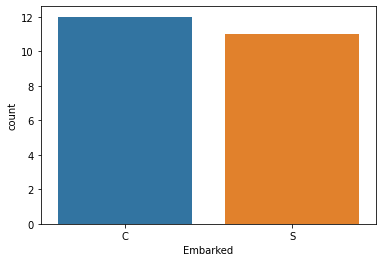

In [16]:
temp1=train.loc[(train.Sex == 'female') & (train.Fare > 70.0) & (train.Fare < 90.0)]
sns.countplot('Embarked',data=temp1)

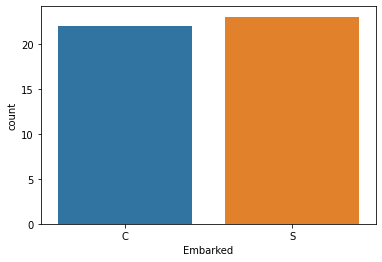

In [17]:
temp2 = train.filter(["Cabin","Embarked"], axis=1)
temp2["Deck"] = temp2["Cabin"].str.slice(0,1)
sns.countplot('Embarked',data=temp2.loc[temp2.Deck == 'B'])

In [18]:
train.loc[(train.PassengerId == 62), 'Embarked'] = 'S'
train.loc[(train.PassengerId == 830), 'Embarked'] = 'C'
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


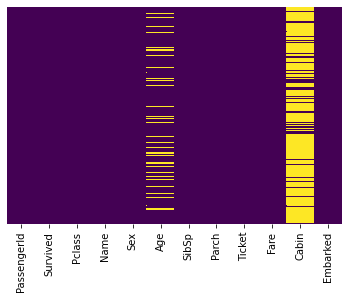

In [19]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [20]:
temp3=train.filter(['Cabin','Survived'], axis=1)
temp3['Cabin_Null']=np.where(temp3['Cabin'].isnull(), 1, 0)
# 60% of survived have NAN values and 87% of non survived have NAN values
temp3.groupby(['Survived'])['Cabin_Null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_Null, dtype: float64

## Exploratory Data Analysis 
### Relational Analysis

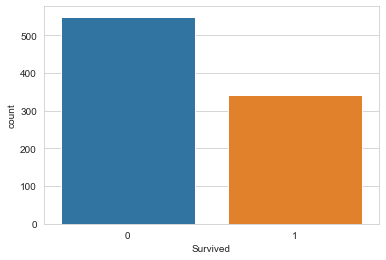

In [21]:
sns.set_style("whitegrid")
sns.countplot("Survived", data=train)

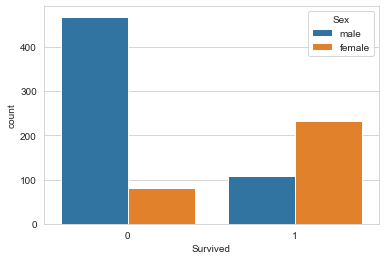

In [22]:
# The Chart confirms Women more likely survivied than Men
sns.set_style('whitegrid')
sns.countplot('Survived', hue='Sex',data=train)

In [23]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


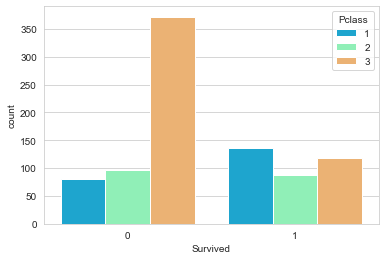

In [24]:
# The Chart confirms 1st class more likely survivied than other classes
# The Chart confirms 3rd class more likely dead than other classes
sns.set_style('whitegrid')
sns.countplot('Survived', hue='Pclass', data=train, palette='rainbow')

In [25]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [26]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


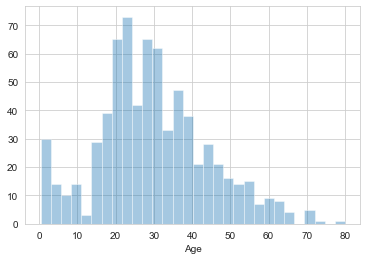

In [27]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

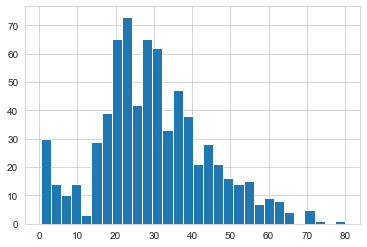

In [28]:
train['Age'].hist(bins=30)

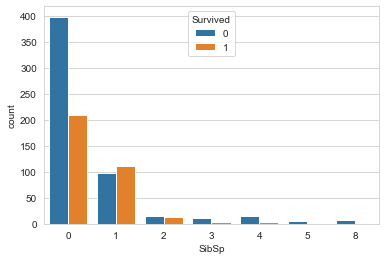

In [29]:
sns.countplot('SibSp', data=train, hue='Survived')

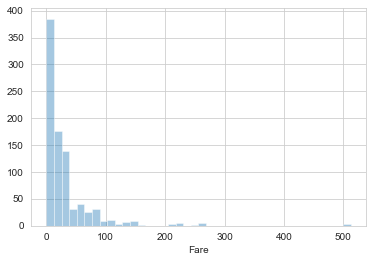

In [30]:
sns.distplot(train['Fare'], kde=False, bins=40)

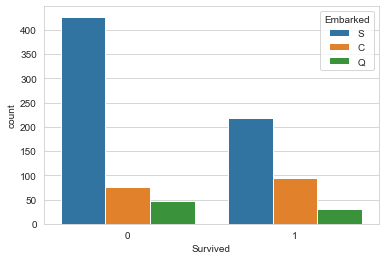

In [31]:
# The Chart confirms a person aboarded from C slightly more likely survived
# The Chart confirms a person aboarded from Q more likely dead
# The Chart confirms a person aboarded from S more likely dead
sns.set_style('whitegrid')
sns.countplot('Survived', hue='Embarked',data=train)

In [32]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.556213
1,Q,0.389610
2,S,0.337984


C:\Users\amits\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


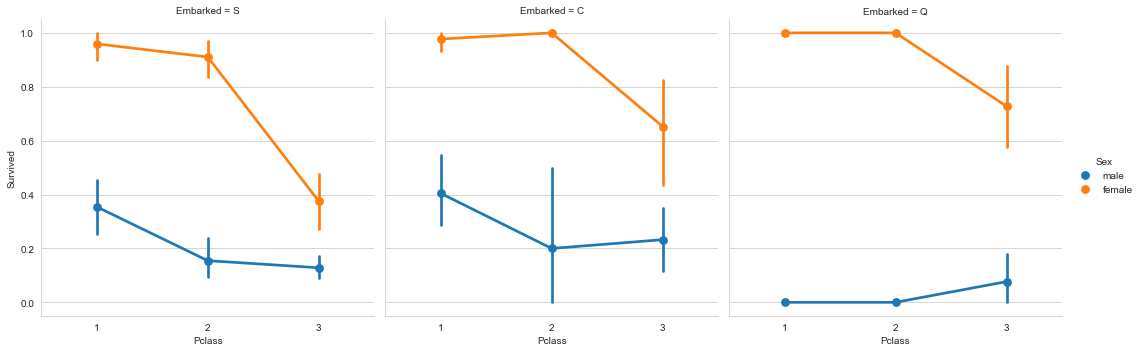

In [33]:
# Almost all females from Pclass 1 and 2 survived.
# Females dying were mostly from 3rd Pclass.
# Males from Pclass 1 only have slightly higher survival chance than Pclass 2 and 3.
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train)

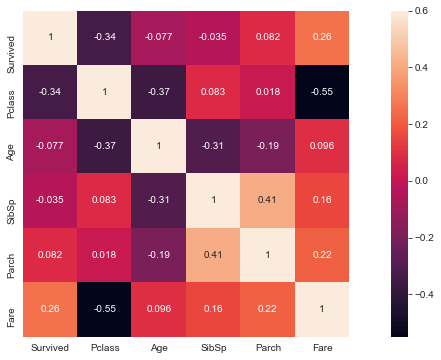

In [34]:
plt.figure(figsize=(15,6))
sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

## Feature Engineering

In [35]:
# combining train and test dataset
train_test_data = [train, test] 

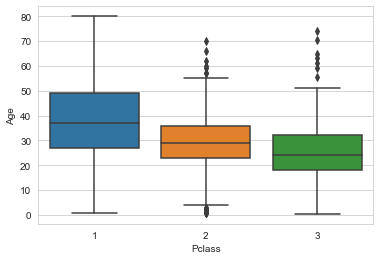

In [36]:
sns.boxplot(x="Pclass", y="Age", data=train)

In [37]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [38]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

In [39]:
train.drop('Cabin',axis=1,inplace=True)

In [40]:
train.dropna(inplace=True)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


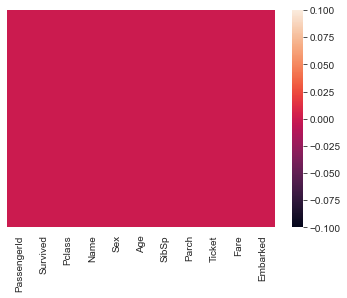

In [42]:
sns.heatmap(train.isnull(),yticklabels=False)

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


In [44]:
for dataset in train_test_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [45]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Countess','Capt', 'Col', \
 	'Don', 'Dr', 'Major', 'Rev', 'Mlle', 'Mme','Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace(['Lady', 'Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Sir', 'Master'], 'Mr')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Miss,0.701087
1,Mr,0.188172
2,Mrs,0.792000
3,Other,0.375000


In [46]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Other": 4}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


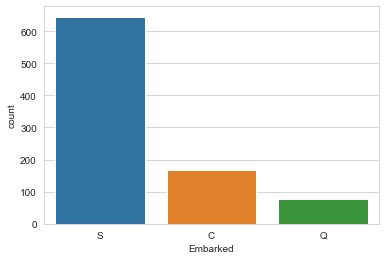

In [47]:
sns.countplot('Embarked', data=train)

In [48]:
# One hot encoding
embark= pd.get_dummies(train['Embarked'],drop_first=True)
sex=pd.get_dummies(train['Sex'], drop_first=True)

In [49]:
train['AgeBand'] = pd.cut(train['Age'], 5)
print (train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

            AgeBand  Survived
0    (0.34, 16.336]  0.550000
1  (16.336, 32.252]  0.336714
2  (32.252, 48.168]  0.412844
3  (48.168, 64.084]  0.434783
4    (64.084, 80.0]  0.090909


In [50]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [51]:
# Combining SibSp & Parch feature, we create a new feature named FamilySize
# Having FamilySize upto 4 (from 2 to 4) has better survival chance.
# FamilySize = 1, i.e. travelling alone has less survival chance.
# Large FamilySize (size of 5 and above) also have less survival chance
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [52]:
for dataset in train_test_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [53]:
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
train['FareBand'] = pd.qcut(train['Fare'], 4)
print (train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [54]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,AgeBand,FamilySize,IsAlone,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0,S,1,"(16.336, 32.252]",2,0,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,3,C,3,"(32.252, 48.168]",2,0,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,1,S,2,"(16.336, 32.252]",1,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,3,S,3,"(32.252, 48.168]",2,0,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,1,S,1,"(32.252, 48.168]",1,1,"(7.91, 14.454]"


In [55]:
train.drop(["Name","Embarked", "Sex","Ticket", "SibSp", "Parch", "AgeBand", "FareBand", "FamilySize"], axis=1, inplace=True)

In [56]:
train.head()

,PassengerId,Survived,Pclass,Age,Fare,Title,IsAlone
0,1,0,3,1.0,0,1,0
1,2,1,1,2.0,3,3,0
2,3,1,3,1.0,1,2,1
3,4,1,1,2.0,3,3,0
4,5,0,3,2.0,1,1,1


In [57]:
train= pd.concat([train,sex,embark], axis=1)

In [58]:
train.head()

,PassengerId,Survived,Pclass,Age,Fare,Title,IsAlone,male,Q,S
0,1,0,3,1.0,0,1,0,1,0,1
1,2,1,1,2.0,3,3,0,0,0,0
2,3,1,3,1.0,1,2,1,0,0,1
3,4,1,1,2.0,3,3,0,0,0,1
4,5,0,3,2.0,1,1,1,1,0,1


In [59]:
test.drop(["Name","Embarked", "Sex","Ticket", "Cabin","SibSp", "Parch", "FamilySize"], axis=1, inplace=True)
test= pd.concat([test,sex,embark], axis=1)
test.head()

,PassengerId,Pclass,Age,Fare,Title,IsAlone,male,Q,S
0,892.0,3.0,2.0,0.0,1.0,1.0,1,0,1
1,893.0,3.0,2.0,0.0,3.0,0.0,0,0,0
2,894.0,2.0,3.0,1.0,1.0,1.0,0,0,1
3,895.0,3.0,1.0,1.0,1.0,1.0,0,0,1
4,896.0,3.0,1.0,1.0,3.0,0.0,1,0,1


## Modelling 

In [73]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [74]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test.drop("PassengerId", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((891, 9), (891,), (891, 8))

In [76]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.74444444 0.78651685 0.6741573  0.74157303 0.69662921 0.74157303
 0.73033708 0.70786517 0.71910112 0.74157303]


In [65]:
round(np.mean(score)*100, 2)

72.84

In [66]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.56666667 0.66292135 0.65168539 0.59550562 0.69662921 0.65168539
 0.59550562 0.65168539 0.56179775 0.52808989]


In [67]:
round(np.mean(score)*100,2)

61.62

In [71]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.73033708 0.76404494 0.71910112 0.74157303 0.78651685
 0.7752809  0.7752809  0.80898876 0.78651685]


In [72]:
round(np.mean(score)*100, 2)

76.54

## Testing and generating O/P

https://www.kaggle.com/chapagain/titanic-solution-a-beginner-s-guide?scriptVersionId=1473689

-

models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent'],
    
    'Score': [acc_log_reg, acc_svc, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd]
    })

models.sort_values(by='Score', ascending=False)

In [81]:
submission = pd.read_csv('../Output/submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
